<a href="https://colab.research.google.com/github/darpan02-cypher/Big-Data-Analytics/blob/main/Logistic_regression/exercise_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is about using Logistic Regression to classify handwritten digits (specifically the numbers 3 and 8) from the scikit-learn digits dataset.

Here's a breakdown of the steps:

Data Loading and Preparation:

Loads the digits dataset.
Selects only the images of the digits 3 and 8.
Splits the data into training and testing sets.
Scales the data to have zero mean and unit variance.

Data Exploration:

Visualizes some sample images to understand the data.

Logistic Regression with L2 Regularization:

Trains a Logistic Regression model with L2 regularization (Ridge Regression) using cross-validation to find the best hyperparameters.
Evaluates the model's accuracy on the testing set.
Visualizes the learned coefficients as a heatmap.

Logistic Regression with L1 Regularization:

Trains a Logistic Regression model with L1 regularization (Lasso Regression) using cross-validation to find the best hyperparameters.
Evaluates the model's accuracy on the testing set.
Visualizes the learned coefficients as a heatmap.

Prediction and Comparison:

Predicts the class probabilities for the testing set using the L1 model.
Compares the predicted probabilities with the actual labels.

Conclusion:

Briefly explains the difference between L1 and L2 regularization, highlighting their strengths and the solvers used for each.

In essence, the code demonstrates how to build and evaluate Logistic Regression models with different regularization techniques for image classification. It focuses on using Python libraries like scikit-learn for data loading, preprocessing, model training, and evaluation.

In [ ]:
# adaptation after
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)

In [ ]:
# load the dataset
digits = datasets.load_digits()
X_raw_all = digits.data
y_raw_all = digits.target

# select only 3s and 8s
ind = (y_raw_all == 3) | (y_raw_all == 8)
X_raw = X_raw_all[ind,:]
y_raw = y_raw_all[ind]
n_samples, n_features = X_raw.shape

print('No. samples = ', n_samples)
print('No. features = ', n_features)

No. samples =  357
No. features =  64


## Some Data Exploration

[[ 0.  1. 10. 15. 11.  1.  0.  0.]
 [ 0.  3.  8.  8. 11. 12.  0.  0.]
 [ 0.  0.  0.  5. 14. 15.  1.  0.]
 [ 0.  0.  0. 11. 15.  2.  0.  0.]
 [ 0.  0.  0.  4. 15.  2.  0.  0.]
 [ 0.  0.  0.  0. 12. 10.  0.  0.]
 [ 0.  0.  3.  4. 10. 16.  1.  0.]
 [ 0.  0. 13. 16. 15. 10.  0.  0.]]


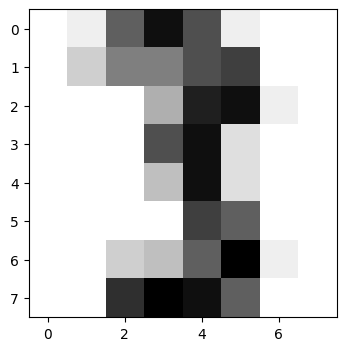

In [ ]:
# plot a single sample
show_sample_no = 10
plt.figure()
plt.imshow(X_raw[show_sample_no,:].reshape((8, 8)), cmap=plt.cm.binary, interpolation='none')
print(X_raw[show_sample_no,:].reshape((8, 8)))

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

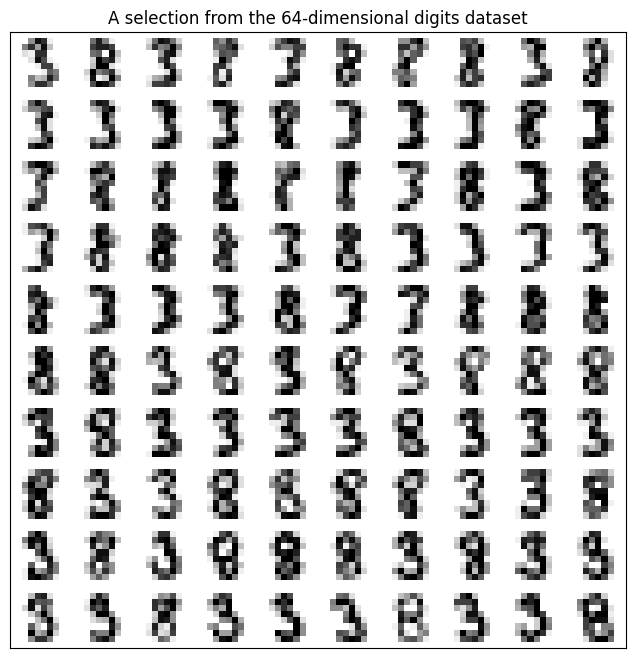

In [ ]:
# Plot images of the digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X_raw[i * n_img_per_row + j].reshape((8, 8))

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [ ]:
# TODO: split the data randomly in 67% training and 33% testing
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.33, random_state=0)

In [ ]:
# TODO: scale the data -> zero mean and unit variance

# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

## Logistic Regression -

#Using  L2 with 10-fold cross-validation

> Add blockquote



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1898: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


1/alpha =  [0.00497702]
coef =  [[ 0.         -0.03976897 -0.039209   -0.05514765 -0.05894793 -0.02378776
  -0.02518056 -0.01995794  0.00937302 -0.03914628  0.00624818  0.02664363
  -0.03516873  0.00898883 -0.00329496 -0.0140524   0.00914875  0.02643377
   0.11678501  0.07151073 -0.05280373  0.04189181  0.03001063  0.
   0.          0.02289788  0.10527637  0.0821858  -0.00806074  0.03602783
   0.03017133  0.          0.          0.01653091  0.07398096  0.0936001
   0.03146811 -0.0530914  -0.05633673  0.          0.          0.02235529
   0.1187212   0.10815731  0.03209338 -0.03139458 -0.0603833   0.
   0.         -0.00195831  0.06485866  0.04240132 -0.02522562 -0.03716709
  -0.04975328 -0.01842509  0.         -0.02650104 -0.05473969 -0.03985713
  -0.00987132 -0.0214661  -0.01224059 -0.01140603]]
accuracy =  0.9830508474576272


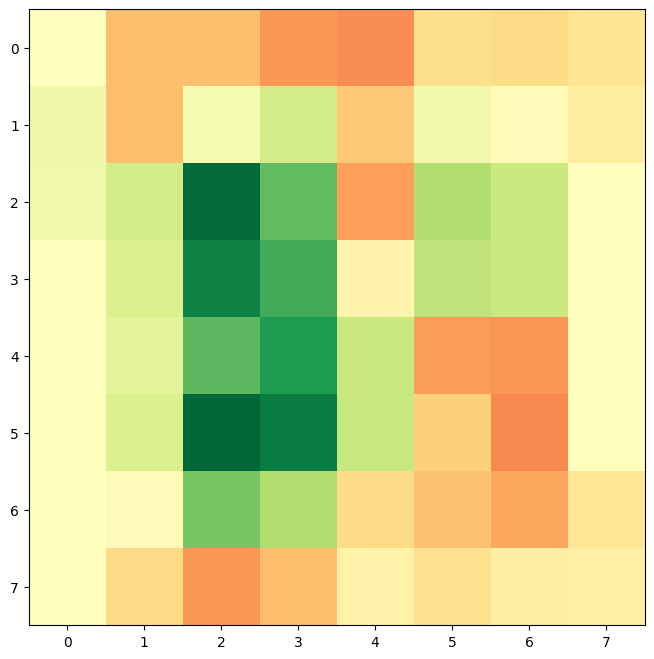

In [ ]:
# train logistic regression & cross validation
clf_L2 = LogisticRegressionCV(Cs=100, cv=10, penalty='l2', random_state=0, multi_class='multinomial', solver='lbfgs', n_jobs=-1)
clf_L2.fit(X_train_scaled, y_train)
print('1/alpha = ', clf_L2.C_)
print('coef = ', clf_L2.coef_)
print('accuracy = ', clf_L2.score(X_test_scaled,y_test))

# Heatmap coefficients
img_coef = clf_L2.coef_.reshape((8,8))
plt.figure()
tmp_max = np.max(np.abs([np.min(clf_L2.coef_), np.max(clf_L2.coef_)]))
plt.imshow(img_coef, cmap=plt.cm.RdYlGn,  vmin=-tmp_max, vmax=tmp_max, interpolation='none')

#using L1 penalty

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1898: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reac

1/alpha =  [10.24]
coef =  [[ 0.   -0.2   0.   -0.19 -0.53  0.   -0.16 -0.03  0.05 -0.16 -0.14 -0.01
  -0.33  0.   -0.02  0.    0.    0.    0.8   0.53 -0.04  0.15  0.    0.
   0.   -0.04  1.04  0.75 -0.01  0.25  0.    0.    0.    0.01  0.26  0.04
   0.33  0.   -0.32  0.    0.    0.    1.25  1.01  0.    0.    0.    0.
   0.    0.    0.27  0.08 -0.34 -0.51 -0.78  0.    0.   -0.02 -0.5  -0.01
   0.    0.   -0.08  0.  ]]
accuracy =  1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


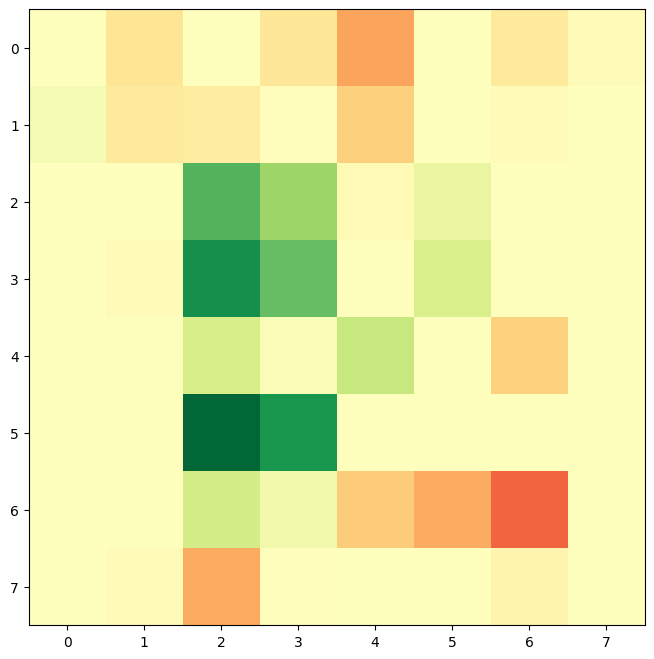

In [ ]:
# train logistic regression & cross validation
clf_L1 = LogisticRegressionCV(Cs=100, cv=10, penalty='l1', random_state=0, multi_class='multinomial', solver='saga', n_jobs=-1) # Changed penalty to 'l1' and solver to 'saga'
clf_L1.fit(X_train_scaled, y_train)
print('1/alpha = ', clf_L1.C_)
print('coef = ', clf_L1.coef_)
print('accuracy = ', clf_L1.score(X_test_scaled,y_test))

# Heatmap coefficients
img_coef = clf_L1.coef_.reshape((8,8))
plt.figure()
tmp_max = np.max(np.abs([np.min(clf_L1.coef_), np.max(clf_L1.coef_)]))
plt.imshow(img_coef, cmap=plt.cm.RdYlGn,  vmin=-tmp_max, vmax=tmp_max, interpolation='none')
plt.show() # Added to display the plot

In [ ]:
# TODO: predict the class probabilities for the testing dataset using L1 model
#       and show them along the actual test classes

# suppress the scientific notation for small floats and use only 2 digits of precision
np.set_printoptions(precision=2,suppress=True)

print('p(0), p(1), actual = \n', np.hstack([clf_L2.predict_proba(X_test_scaled), y_test.reshape(-1,1)])[:10,:])

p(0), p(1), actual = 
 [[0.14 0.86 8.  ]
 [0.95 0.05 3.  ]
 [0.87 0.13 3.  ]
 [0.31 0.69 8.  ]
 [0.65 0.35 3.  ]
 [0.35 0.65 8.  ]
 [0.82 0.18 3.  ]
 [0.87 0.13 3.  ]
 [0.94 0.06 3.  ]
 [0.94 0.06 3.  ]]


#In essence:

**L1 penalty** (Lasso) encourages sparsity in the model coefficients, meaning it tends to set some coefficients to zero. This can be useful for feature selection and improving model interpretability. It uses the 'saga' solver.

**L2 penalty**(Ridge) shrinks the coefficients towards zero but does not set them exactly to zero. It helps to prevent overfitting and improves generalization. It uses the 'lbfgs' solver.